In [263]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import kagglehub
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
#Import the CSV file to be analyzed
health_data = pd.read_csv('/Users/everettmartell/Downloads/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv')


# EDA of Health Data

In [264]:
#check the columns of the file 
health_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [265]:
#Confirm the data types.

health_data.dtypes


Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [266]:
#show a summary of the entire data frame
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Check for any Missing Values and Setup Data for Analysis 

In [267]:
#Check for missing values
health_data.isna().sum()
#No missing values in any column other than Sleep Disorder, which represents 219 persons without.
health_data = health_data.fillna("None")

#finding out the unique value in the categorical columns
Occupation_count = health_data['Occupation'].nunique()
print(f"Number of unique values in 'Occupation': {Occupation_count}")

Sleep_Disorder_count = health_data['Sleep Disorder'].nunique()
print(f"Number of unique values in 'Sleep Disorder': {Sleep_Disorder_count}")

Number of unique values in 'Occupation': 11
Number of unique values in 'Sleep Disorder': 3


## List of items we want to test with the data for Relationships.
* Relationship between Occupation and Sleep Duration
* Relationship between Occupation and Daily Steps.
* Relationship between Daily Steps and BMI Category.
* Relationship between Sleep Disorder and BMI Category.


## Analysis of Occupation and Sleep Duration.

In [268]:
#create a Dataframe that takes each unique occupation value and find the average amount of sleep
Sleep_Duration_by_Occupation = health_data.groupby(['Occupation'])['Sleep Duration'].mean().sort_values(ascending=False).reset_index()
Sleep_Duration_by_Occupation.head(12)

,Occupation,Sleep Duration
0,Engineer,7.987302
1,Lawyer,7.410638
2,Accountant,7.113514
3,Nurse,7.063014
4,Doctor,6.970423
5,Manager,6.900000
6,Software Engineer,6.750000
7,Teacher,6.690000
8,Salesperson,6.403125
9,Scientist,6.000000


## Visualizations Using Bar Graphs and Scatter Plots.

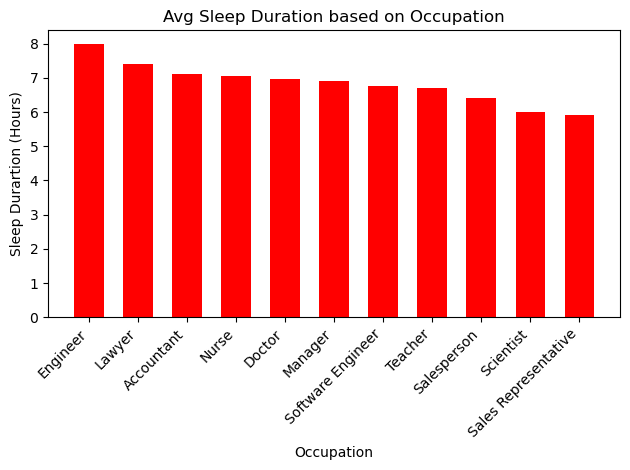

In [269]:
x = Sleep_Duration_by_Occupation['Occupation']
y = Sleep_Duration_by_Occupation['Sleep Duration']

plt.bar(x, y, color='red', width=0.6)

plt.xlabel('Occupation')
plt.ylabel('Sleep Durartion (Hours)')
plt.title('Avg Sleep Duration based on Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Analysis of Occupation and Daily Steps

In [270]:
#Create a new df for Occupation and  avg daily steps

occupation_steps = health_data.groupby(['Occupation'])['Daily Steps'].mean().sort_values(ascending=False).reset_index()
occupation_steps.head(11)

,Occupation,Daily Steps
0,Nurse,8057.534247
1,Lawyer,7661.702128
2,Accountant,6881.081081
3,Doctor,6808.450704
4,Salesperson,6000.000000
5,Engineer,5980.952381
6,Teacher,5957.500000
7,Software Engineer,5800.000000
8,Manager,5500.000000
9,Scientist,5350.000000


## Visualization of Daily steps based on Occupation

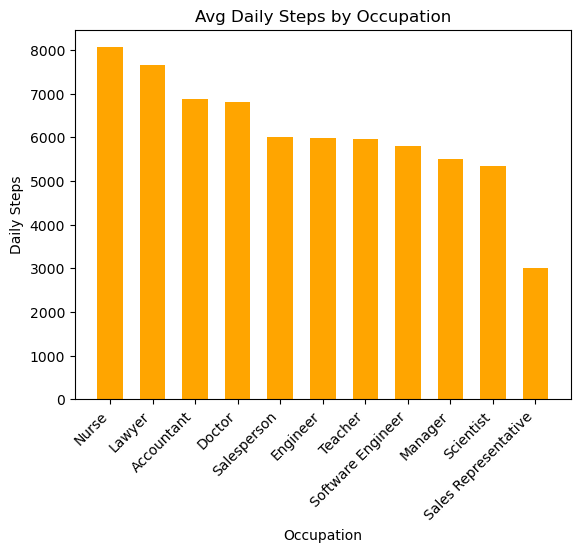

In [271]:
x = occupation_steps['Occupation']
y = occupation_steps['Daily Steps']

plt.bar(x, y, color='orange', width=0.6)
plt.xlabel('Occupation')
plt.ylabel('Daily Steps')
plt.title('Avg Daily Steps by Occupation')
plt.xticks(rotation=45, ha='right')

plt.show()

## Analysis of the relationship between BMI Category and Daily Steps

In [272]:
steps_bmi = health_data.groupby(['BMI Category'])['Daily Steps'].mean().sort_values(ascending=False).reset_index()
steps_bmi.head(12)

,BMI Category,Daily Steps
0,Overweight,6965.540541
1,Normal,6887.179487
2,Normal Weight,6766.666667
3,Obese,3350.000000


## Visualization of Avg Daily Steps based on BMI

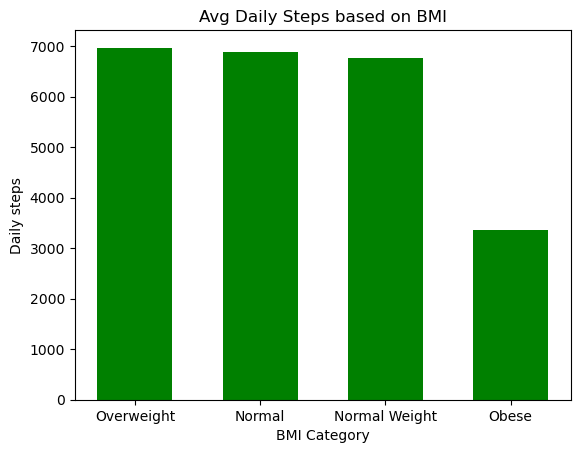

In [273]:
x = steps_bmi['BMI Category']
y = steps_bmi['Daily Steps']

plt.bar(x, y, color='green', width=0.6)
plt.title('Avg Daily Steps based on BMI')
plt.xlabel('BMI Category')
plt.ylabel('Daily steps')

plt.show()

In [274]:
#create a function for the percentage differnce between mean values.
def percentage_diff_mean(mean1, mean2):
    
    return (abs(mean1 - mean2) / ((mean1 + mean2) / 2)) * 100

mean1 = 6766.67
mean2 = 3350.00

difference = percentage_diff_mean(mean1,mean2)
print(f"Percentage difference between {mean1} and {mean2} is: {difference:.2f}%")


Percentage difference between 6766.67 and 3350.0 is: 67.55%


#### This finding is very interesting as daily steps between overweight and normal weight individuals are practically similar, but if you are classified as obese, the average daily steps between normal weight and obese is 67.55%

## Visualization of Sleep Disorder count based on BMI

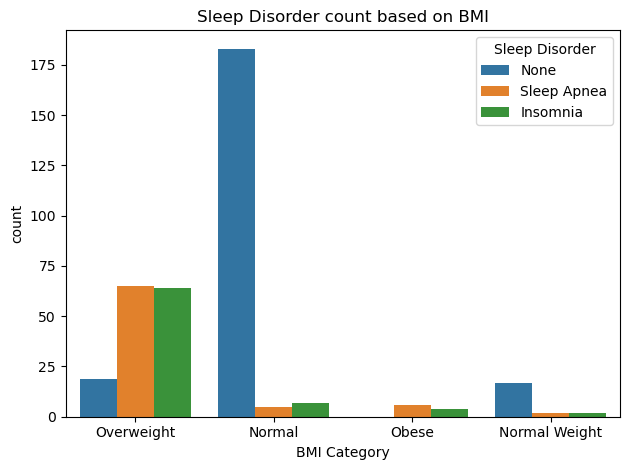

In [275]:

sns.countplot(data=health_data, x='BMI Category', hue = 'Sleep Disorder')
plt.title('Sleep Disorder count based on BMI')
plt.tight_layout()


#### This graph shows that if you have normal weight and BMI status, your chances of developing a sleep disorder is very low. If a person is overweight or obese, they are more likely to have a sleep disorder than not having one. Next I will run a Logistic Regression to predict if certain features are better at predicting Sleep Disorders.

# Logistic Regression for Sleep Prediction

In [276]:
#One-hot encode BMI Category 
health_data = pd.get_dummies(health_data, columns=['BMI Category'], drop_first=False)



In [277]:
health_data.head(50)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,None,False,False,False,True
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,None,True,False,False,False
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,None,True,False,False,False
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,False,False,True,False
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,False,False,True,False
5,6,Male,28,Software Engineer,5.9,4,30,8,140/90,85,3000,Insomnia,False,False,True,False
6,7,Male,29,Teacher,6.3,6,40,7,140/90,82,3500,Insomnia,False,False,True,False
7,8,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,True,False,False,False
8,9,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,True,False,False,False
9,10,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,None,True,False,False,False


In [278]:
#Turn the categorical variables of sleep disorders to Binary with '0' meaning no sleep disorder and 1 meaning you do.
health_data['Sleep Disorder'] = health_data['Sleep Disorder'].map({'Sleep Apnea': 1, 'Insomnia': 1, 'None': 0})

        

        
        

In [279]:
health_data.head(30)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,0,False,False,False,True
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,0,True,False,False,False
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,0,True,False,False,False
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,1,False,False,True,False
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,1,False,False,True,False
5,6,Male,28,Software Engineer,5.9,4,30,8,140/90,85,3000,1,False,False,True,False
6,7,Male,29,Teacher,6.3,6,40,7,140/90,82,3500,1,False,False,True,False
7,8,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,0,True,False,False,False
8,9,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,0,True,False,False,False
9,10,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,0,True,False,False,False


In [280]:
#Imprt sklearn tools in notebook
import numpy
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#create features that will be used as X
features = ['BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight']

X = health_data[features]
y = health_data['Sleep Disorder']

#create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#create predictions variable called y_pred
y_pred = model.predict(X_test)

#print confusion matrix and classification report
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))






Accuracy: 0.92
[[40  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75

